# Applications of deep neural network for denoising data

## Denoising Autoencoder with Keras libraries

## Import libraries
first the required libraries are imported 

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
os.getcwd()

'C:\\Users\\ge97wiy'

## Import Data

In [5]:
Data = np.genfromtxt('Data.csv', delimiter=",",skip_header=1)


In [42]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(Data)
A_train = data_scaled[:750]
A_test = data_scaled[750:1000]

In [43]:
idt = np.random.choice(750, 100, replace=False) # idt is the number of noise for training samples
idx = np.random.choice(250, 30, replace=False)  # idx is the number of noise for testing samples


In [44]:
Train_noisy= A_train
Test_noisy = A_test
Train_noisy[idt] = Train_noisy[idt] + np.random.normal(0,0.025,(Train_noisy[idt].shape[0],Train_noisy[idt].shape[1]))
Test_noisy[idx] = Test_noisy[idx] + np.random.normal(0,0.025,(Test_noisy[idx].shape[0],Test_noisy[idx].shape[1]))

In [ ]:
plt.plot(Train_noisy)

In [ ]:
Test_noisy=A_test+np.random.normal(0,0.025,(A_test.shape[0],A_test.shape[1]))


In [ ]:
np.random.choice?

## Building model 

In [45]:
model = Sequential()
input_data = Input(shape=(A_train.shape[1],))
encoded=Dense(5, activation='tanh')(input_data)
encoded=Dense(4, activation='tanh')(encoded)
encoded=Dense(4, activation='tanh')(encoded)
hidden=Dense(3, activation='tanh')(encoded)  
decoded=Dense(4, activation='tanh')(hidden)
decoded=Dense(4, activation='tanh')(decoded)
decoded=Dense(5, activation='tanh')(decoded)
output=Dense(A_train.shape[1])(decoded)
autoencoder= Model(input_data,output)  
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
history=autoencoder.fit(Train_noisy,A_train, verbose=1 , epochs=600)


Epoch 1/600
24/24 [==============================] - 0s 667us/step - loss: 0.2821
Epoch 2/600
24/24 [==============================] - 0s 695us/step - loss: 0.1737
Epoch 3/600
24/24 [==============================] - 0s 686us/step - loss: 0.1219
Epoch 4/600
24/24 [==============================] - 0s 692us/step - loss: 0.0787
Epoch 5/600
24/24 [==============================] - 0s 694us/step - loss: 0.0454
Epoch 6/600
24/24 [==============================] - 0s 704us/step - loss: 0.0264
Epoch 7/600
24/24 [==============================] - 0s 709us/step - loss: 0.0181
Epoch 8/600
24/24 [==============================] - 0s 693us/step - loss: 0.0121
Epoch 9/600
24/24 [==============================] - 0s 693us/step - loss: 0.0098
Epoch 10/600
24/24 [==============================] - 0s 696us/step - loss: 0.0080
Epoch 11/600
24/24 [==============================] - 0s 728us/step - loss: 0.0063
Epoch 12/600
24/24 [==============================] - 0s 693us/step - loss: 0.0056
Epoch 13/600


24/24 [==============================] - 0s 696us/step - loss: 1.6598e-04
Epoch 191/600
24/24 [==============================] - 0s 683us/step - loss: 1.4537e-04
Epoch 192/600
24/24 [==============================] - 0s 698us/step - loss: 1.6255e-04
Epoch 193/600
24/24 [==============================] - 0s 714us/step - loss: 1.4954e-04
Epoch 194/600
24/24 [==============================] - 0s 745us/step - loss: 1.3783e-04
Epoch 195/600
24/24 [==============================] - 0s 745us/step - loss: 1.3509e-04
Epoch 196/600
24/24 [==============================] - 0s 695us/step - loss: 1.4111e-04
Epoch 197/600
24/24 [==============================] - 0s 655us/step - loss: 1.5834e-04
Epoch 198/600
24/24 [==============================] - 0s 720us/step - loss: 1.4490e-04
Epoch 199/600
24/24 [==============================] - 0s 667us/step - loss: 1.4817e-04
Epoch 200/600
24/24 [==============================] - 0s 693us/step - loss: 1.5508e-04
Epoch 201/600
24/24 [=========================

Epoch 376/600
24/24 [==============================] - 0s 630us/step - loss: 6.7033e-05
Epoch 377/600
24/24 [==============================] - 0s 714us/step - loss: 7.0274e-05
Epoch 378/600
24/24 [==============================] - 0s 694us/step - loss: 6.3460e-05
Epoch 379/600
24/24 [==============================] - 0s 694us/step - loss: 6.6650e-05
Epoch 380/600
24/24 [==============================] - 0s 694us/step - loss: 6.9654e-05
Epoch 381/600
24/24 [==============================] - 0s 651us/step - loss: 7.1042e-05
Epoch 382/600
24/24 [==============================] - 0s 635us/step - loss: 7.2379e-05
Epoch 383/600
24/24 [==============================] - 0s 689us/step - loss: 7.3723e-05
Epoch 384/600
24/24 [==============================] - 0s 662us/step - loss: 7.5823e-05
Epoch 385/600
24/24 [==============================] - 0s 759us/step - loss: 6.6016e-05
Epoch 386/600
24/24 [==============================] - 0s 684us/step - loss: 6.6217e-05
Epoch 387/600
24/24 [===========

Epoch 561/600
24/24 [==============================] - 0s 694us/step - loss: 6.7063e-05
Epoch 562/600
24/24 [==============================] - 0s 737us/step - loss: 6.0611e-05
Epoch 563/600
24/24 [==============================] - 0s 694us/step - loss: 6.4509e-05
Epoch 564/600
24/24 [==============================] - 0s 694us/step - loss: 6.3659e-05
Epoch 565/600
24/24 [==============================] - 0s 650us/step - loss: 5.5055e-05
Epoch 566/600
24/24 [==============================] - 0s 650us/step - loss: 5.3613e-05
Epoch 567/600
24/24 [==============================] - 0s 658us/step - loss: 6.1870e-05
Epoch 568/600
24/24 [==============================] - 0s 692us/step - loss: 6.4207e-05
Epoch 569/600
24/24 [==============================] - 0s 649us/step - loss: 6.4527e-05
Epoch 570/600
24/24 [==============================] - 0s 694us/step - loss: 5.6090e-05
Epoch 571/600
24/24 [==============================] - 0s 781us/step - loss: 6.1848e-05
Epoch 572/600
24/24 [===========

In [46]:
predictions=autoencoder.predict(Test_noisy)
score = (mean_squared_error(A_test, predictions))
score

0.007475390496114897

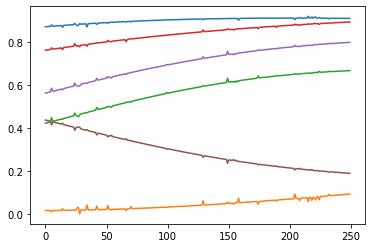

In [47]:
plt.plot(predictions)